<a href="https://colab.research.google.com/github/UliksSekiraqa/StockMarketAnalysis/blob/master/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##All imports go here

In [ ]:
!pip install alpha_vantage
!pip install yfinance

     |████████████████████████████████| 1.2MB 4.0MB/s 
     |████████████████████████████████| 256kB 13.5MB/s 
     |████████████████████████████████| 153kB 17.3MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25705 sha256=171d3d3ca09526d9ebee269d8ed5cb2e78da6d114f16fdacc9da0082af6d7da5
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=cfaa49157423afb674673ac24a51806dd3eb489661e51b5cb1037894944fcbb3
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl
  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=0917455ea49072d5d6735fc7a3dba10cdec5587c0f4e0d436b7c1f4c81d7a3b9
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f2

In [ ]:
#Running Python 3.6.9
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import alpha_vantage as av
from alpha_vantage.timeseries import TimeSeries
import yfinance as yf

##Scraping stock market data with Alpha Vantage

In [ ]:
#Alpha Vantage code starts here

#from alpha_vantage.timeseries import TimeSeries
  
'''
This method fetch real-time and historical stock prices for an equity from AlphaVantage API.
Return daily split/dividend-adjusted close for the equity from from Nov 1st, 2019 to Jul 1st, 2020.
Keyword Arguments:
    symbol: the symbol for the equity we want to get its data
'''
def get_from_alpha_vantage(company_symbol:str):
    # fetch historical stock prices from AlphaVantage
    # outputsize='full' returns the full-length daily times series, commonly above 1MB
    ts = TimeSeries(key='ALTGA3K77UQA49VX', output_format='pandas', indexing_type='date')
    data, meta_data = ts.get_daily_adjusted(symbol=company_symbol, outputsize='full')

    # select data from Nov 1st, 2019 to Jun 30th, 2020
    start_date = datetime.datetime(2019, 11, 1)
    end_date = datetime.datetime(2020, 6, 30)
    filtered_data = data.loc[data.index.values >= np.datetime64(start_date)]
    filtered_data = filtered_data.loc[filtered_data.index.values <= np.datetime64(end_date)]
    
    # only select adjusted close from given attributes
    filtered_data = filtered_data[['5. adjusted close']]
    filtered_data.columns = ['adj_close']

    return filtered_data

In [ ]:
JPM = get_from_alpha_vantage('JPM')
AXP = get_from_alpha_vantage('AXP')
WFC = get_from_alpha_vantage('WFC')
MS = get_from_alpha_vantage('MS')

In [ ]:
HSBA = get_from_alpha_vantage('LON:HSBA')
BNC = get_from_alpha_vantage('LON:BNC')
LLOY = get_from_alpha_vantage('LON:LLOY')
RBS = get_from_alpha_vantage('LON:RBS')

In [ ]:
# check if there's inconsisitency in the size of datasets
print(len(JPM))
print(len(AXP))
print(len(WFC))
print(len(MS))
print(len(HSBA))
print(len(BNC))
print(len(LLOY))
print(len(RBS))

166
166
166
166
166
166
166
166


In [ ]:
# check if any values are null
print(JPM.isnull().values.any())
print(AXP.isnull().values.any())
print(WFC.isnull().values.any())
print(MS.isnull().values.any())
print(HSBA.isnull().values.any())
print(BNC.isnull().values.any())
print(LLOY.isnull().values.any())
print(RBS.isnull().values.any())

False
False
False
False
False
False
False
False


In [ ]:
equities_names = ['JPM','AXP','WFC','MS','LON:HSBA','LON:BNC','LON:LLOY','LON:RBS']
equities = pd.DataFrame(index=JPM.index.values, columns=equities_names)

equities['JPM'] = JPM.values
equities['AXP'] = AXP.values
equities['WFC'] = WFC.values
equities['MS'] = MS.values
equities['HSBA'] = HSBA.values
equities['BNC'] = BNC.values
equities['LLOY'] = LLOY.values
equities['RBS'] = RBS.values

equities

,JPM,AXP,WFC,MS,LON:HSBA,LON:BNC,LON:LLOY,LON:RBS,HSBA,BNC,LLOY,RBS
2020-06-30,93.1552,94.7667,25.6000,48.3000,NaN,NaN,NaN,NaN,378.6000,202.9000,31.1750,121.6000
2020-06-29,92.1054,94.0898,25.7000,47.2400,NaN,NaN,NaN,NaN,384.8000,204.4500,31.2550,121.2000
2020-06-26,91.6993,92.9948,25.3400,47.0500,NaN,NaN,NaN,NaN,380.2500,196.1400,31.0850,118.5000
2020-06-25,97.0177,97.4047,27.3700,48.7900,NaN,NaN,NaN,NaN,384.3500,191.8200,31.6200,120.2000
2020-06-24,93.7494,95.0454,26.1200,46.9500,NaN,NaN,NaN,NaN,380.8000,195.0000,31.6100,119.7000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-07,126.5621,119.6458,52.3734,47.9343,NaN,NaN,NaN,NaN,578.0670,313.7567,52.8732,207.8133
2019-11-06,125.8806,118.0772,51.6912,47.8358,NaN,NaN,NaN,NaN,575.4692,305.1147,53.0673,208.1987
2019-11-05,125.6859,117.1696,51.2108,48.0230,NaN,NaN,NaN,NaN,575.2768,307.5232,53.6959,208.5841
2019-11-04,125.4133,118.0082,50.6535,48.1018,NaN,NaN,NaN,NaN,573.4486,312.2928,53.4186,208.7768


## Scraping stock index data with yfinance


### Shanghai Stock Exchange

In [ ]:
#yfinance code starts here
import pandas as pd
from pandas_datareader import data as pdr
#nasdaq = yf.Ticker("^IXIC")
#print(nasdaq.info)
#hist =nasdaq.history(period="1y")
#print(hist)
yf.pdr_override
df = pdr.get_data_yahoo("000001.SS", start = "2019-01-01", end = "2020-07-01")
#df.head()
new_df = pd.DataFrame(df,columns=["Close"])
new_df
new_df.to_csv("sse.csv")

                  Close
Date                   
2019-01-02  2465.291016
2019-01-03  2464.363037
2019-01-04  2514.867920
2019-01-07  2533.089111
2019-01-08  2526.461914
...                 ...
2020-06-24  2979.551025
2020-06-29  2961.516113
2020-06-30  2984.674072
2020-07-01  3025.980957
2020-07-02  3090.569092

[360 rows x 1 columns]


###SP500


In [ ]:
# Scraping index data from various countries and saving it in their specific variable names
#!pip install yfinance
#import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
USA_SP500 = yf.Ticker("^GSPC").history(period="1y")
USA_SP500 = USA_SP500[['Close']]
new_df= pd.DataFrame(USA_SP500,columns=["Close"])
print(new_df.head())
#new_df.to_csv("SP500.csv")

USA_NAS = yf.Ticker("^IXIC").history(period="1y")
USA_NAS = USA_NAS[['Close']]
new_df2= pd.DataFrame(USA_NAS,columns=["Close"])
print(new_df2.head())
#new_df.to_csv("nasdaq.csv")


horizontal_stack = pd.concat([new_df, new_df2], axis=1)
print(horizontal_stack)
horizontal_stack.to_csv("test.csv")

              Close
Date               
2019-07-15  3014.30
2019-07-16  3004.04
2019-07-17  2984.42
2019-07-18  2995.11
2019-07-19  2976.61
              Close
Date               
2019-07-15  8258.19
2019-07-16  8222.80
2019-07-17  8185.21
2019-07-18  8207.24
2019-07-19  8146.49
              Close     Close
Date                         
2019-07-15  3014.30   8258.19
2019-07-16  3004.04   8222.80
2019-07-17  2984.42   8185.21
2019-07-18  2995.11   8207.24
2019-07-19  2976.61   8146.49
...             ...       ...
2020-07-08  3169.94  10492.50
2020-07-09  3152.05  10547.75
2020-07-10  3185.04  10617.44
2020-07-13  3155.22  10390.84
2020-07-14  3181.93  10433.90

[253 rows x 2 columns]


###NASDAQ

In [ ]:
USA_NAS = yf.Ticker("^IXIC").history(period="1y")
USA_NAS = USA_NAS[['Close']]
new_df= pd.DataFrame(USA_NAS,columns=["Close"])
print(new_df.head())
new_df.to_csv("nasdaq.csv")

,Close
Date,
2019-07-15,8258.19
2019-07-16,8222.80
2019-07-17,8185.21
2019-07-18,8207.24
2019-07-19,8146.49
...,...
2020-07-07,10343.89
2020-07-08,10492.50
2020-07-09,10547.75


### DOW JONES

In [ ]:
USA_DJ = yf.Ticker("DJI").history(period="1y")
USA_DJ = USA_DJ[['Close']]
new_df= pd.DataFrame(USA_DJ,columns=["Close"])
print(new_df.head())
new_df.to_csv("Dow Jones.csv")

              Close
Date               
2019-09-27  26820.2
2019-10-16  27002.0
2020-01-23  29160.1
2020-01-24  28989.7
2020-01-27  28535.8


###NIKKEI 225

In [ ]:
nikkei = yf.Ticker("^N225").history(period="1y")
nikkei = nikkei[['Close']]
new_df= pd.DataFrame(nikkei,columns=["Close"])
print(new_df.head())
new_df.to_csv("nikkei 225.csv")

               Close
Date                
2019-07-16  21535.25
2019-07-17  21469.18
2019-07-18  21046.24
2019-07-19  21466.99
2019-07-22  21416.79


###FTSE 100

In [ ]:
ftse = yf.Ticker("^FTSE").history(period="1y")
ftse = ftse[['Close']]
new_df= pd.DataFrame(ftse,columns=["Close"])
print(new_df.head())
new_df.to_csv("ftse.csv")

             Close
Date              
2019-07-15  7531.7
2019-07-16  7577.2
2019-07-17  7535.5
2019-07-18  7493.1
2019-07-19  7508.7


###SSE

In [ ]:
SSE_data = yf.Ticker("000001.SS").history(period="1y")
SSE = SSE_data[['Close']]
new_df= pd.DataFrame(SSE,columns=["Close"])
print(new_df.head())
new_df.to_csv("sse.csv")

              Close
Date               
2019-07-15  2942.19
2019-07-16  2937.62
2019-07-17  2931.69
2019-07-18  2901.18
2019-07-19  2924.20


###EURO STOXX 50

In [ ]:
euro_stoxx = yf.Ticker("^STOXX50E").history(period="1y")
euro = euro_stoxx[['Close']]

new_df= pd.DataFrame(euro,columns=["Close"])
print(new_df.head())
new_df.to_csv("euro.csv")

              Close
Date               
2019-07-15  3502.22
2019-07-16  3521.36
2019-07-17  3501.58
2019-07-18  3482.83
2019-07-19  3480.18


###DAX

In [ ]:
dax_germany = yf.Ticker("^GDAXI").history(period="1y")
dax = dax_germany[['Close']]
new_df= pd.DataFrame(dax,columns=["Close"])
print(new_df.head())
new_df.to_csv("dax.csv")

               Close
Date                
2019-07-15  12387.34
2019-07-16  12430.97
2019-07-17  12341.03
2019-07-18  12227.85
2019-07-19  12260.07


### Read all Stocks function and save to file

In [ ]:
"""
!pip install yfinance
import yfinance as yf
import requests
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import os
"""
def readAllStocks():
    ftse = yf.Ticker("^FTSE").history(period="1y")
    dax_germany = yf.Ticker("^GDAXI").history(period="1y")
    euro_stoxx = yf.Ticker("^STOXX50E").history(period="1y")
    SSE_data =  yf.Ticker("000001.SS").history(period="1y")
    USA_NAS = yf.Ticker("^IXIC").history(period="1y")
    USA_DJ = yf.Ticker("DJI").history(period="1y")
    USA_SP500 = yf.Ticker("^GSPC").history(period="1y")
    nikkei = yf.Ticker("^N225").history(period="1y")


    ftseDf = pd.DataFrame(ftse, columns=["Close"])
    daxDf = pd.DataFrame(dax_germany, columns=["Close"])
    euroDf = pd.DataFrame(euro_stoxx, columns=["Close"])
    sseDf = pd.DataFrame(SSE_data, columns=["Close"])
    nasDf = pd.DataFrame(USA_NAS, columns=["Close"])
    dowjonesDf = pd.DataFrame(USA_DJ, columns=["Close"])
    sp500Df = pd.DataFrame(USA_SP500, columns=["Close"])
    nikkeiDf = pd.DataFrame(nikkei, columns=["Close"])

    
    #frames =[ftseDf,daxDf,euroDf,sseDf,nasDf,dowjonesDf,sp500Df,nikkeiDf]
    horizontal_stack = pd.concat([ftseDf, daxDf,euroDf,sseDf,nasDf,dowjonesDf,sp500Df,nikkeiDf], axis=1)
   
    print(horizontal_stack)
    print (horizontal_stack.describe())
    #horizontal_stack.to_csv("result.csv")
    
readAllStocks()


              Close     Close    Close  ...  Close    Close     Close
Date                                    ...                          
2019-07-15  7531.70  12387.34  3502.22  ...    NaN  3014.30       NaN
2019-07-16  7577.20  12430.97  3521.36  ...    NaN  3004.04  21535.25
2019-07-17  7535.50  12341.03  3501.58  ...    NaN  2984.42  21469.18
2019-07-18  7493.10  12227.85  3482.83  ...    NaN  2995.11  21046.24
2019-07-19  7508.70  12260.07  3480.18  ...    NaN  2976.61  21466.99
...             ...       ...      ...  ...    ...      ...       ...
2020-07-08  6156.20  12494.81  3286.09  ...    NaN  3169.94  22438.65
2020-07-09  6049.60  12489.46  3261.17  ...    NaN  3152.05  22529.29
2020-07-10  6095.40  12633.71  3296.22  ...    NaN  3185.04  22290.81
2020-07-13  6176.20  12799.97  3350.00  ...    NaN  3155.22  22784.74
2020-07-14  6179.75  12697.36  3321.39  ...    NaN  3197.52  22587.01

[261 rows x 8 columns]
             Close         Close  ...        Close         Close
c

##This section is for plotting the data onto graphs


 Reading the stocks from File

          FTSE 100           DAX  ...        SP500    Nikkei 225
count   254.000000    252.000000  ...   253.000000    243.000000
mean   6839.930118  12143.564246  ...  3012.987787  21760.360041
std     729.676729   1183.007286  ...   210.021678   1699.734398
min    4993.900000   8441.710000  ...  2237.400000  16552.830000
25%    6157.475000  11656.062500  ...  2919.400000  20606.860000
50%    7212.050000  12370.035000  ...  3009.050000  22044.450000
75%    7401.500000  13147.180000  ...  3140.980000  23210.445000
max    7686.600000  13789.000000  ...  3386.150000  24083.510000

[8 rows x 8 columns]


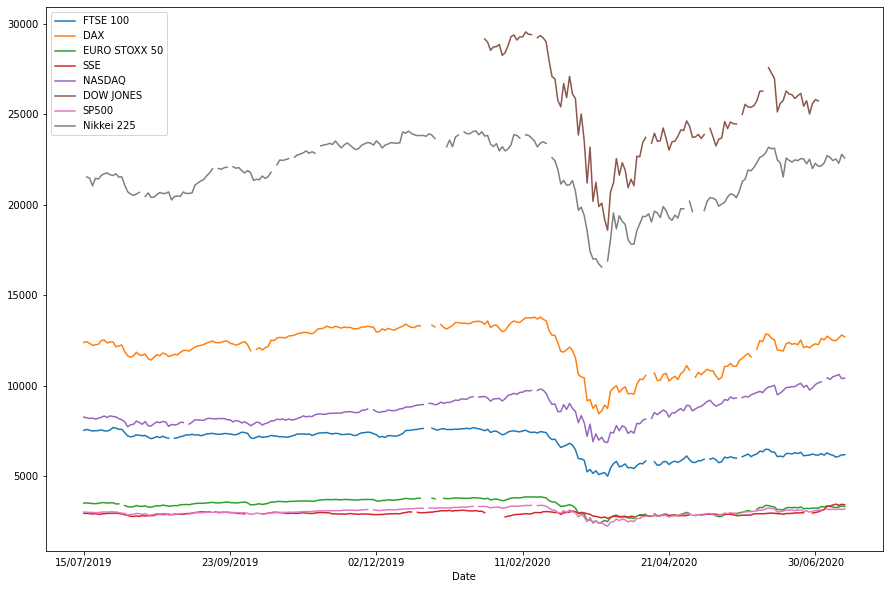

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("result.csv")
df = df.set_index('Date')
df.plot(figsize=(15,10))
print(df.describe())


##Heatmap of all stocks

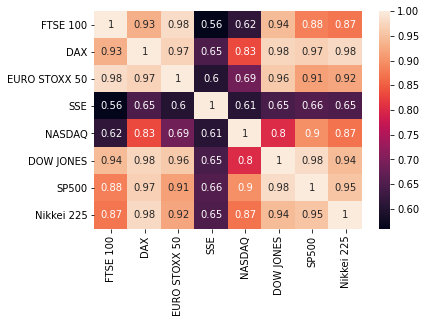

In [6]:
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('result.csv')
corr = (df.dropna()).corr()
sns.heatmap(corr, annot =True)

##Showing a Moving Average of the stocks

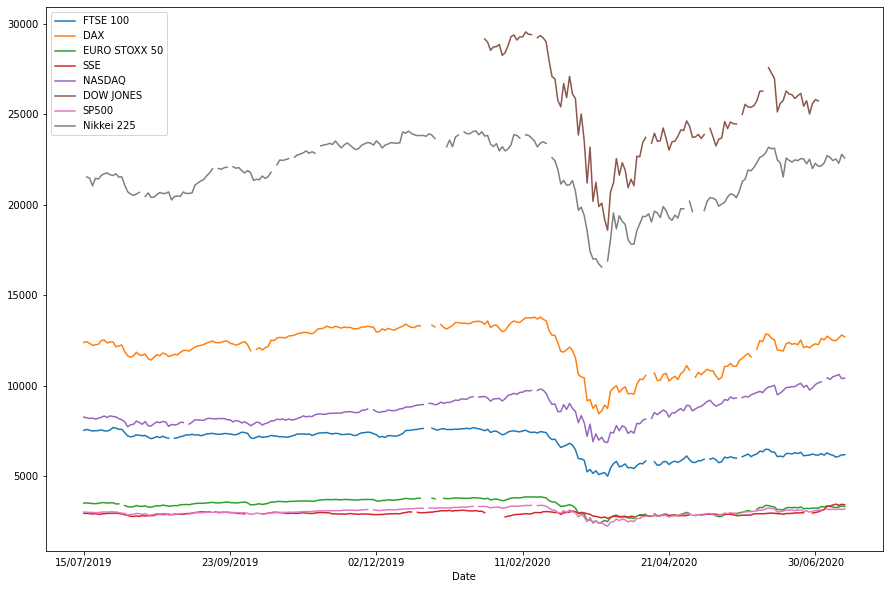

In [7]:
df = df.set_index('Date')
days =50 #average of the first fifty rows
df.rolling(days).mean()
df.plot(figsize=(15,10))

In [ ]:
# load AlphaVantage data from csv file
df = pd.read_csv('avData.csv', index_col=0)
new_names = {"LON:HSBA":"HSBA","LON:BNC":"BNC","LON:LLOY":"LLOY","LON:RBS":"RBS"}
df.rename(columns=new_names, inplace=True)
df

,JPM,AXP,WFC,MS,HSBA,BNC,LLOY,RBS
2020-06-30,93.1552,94.7667,25.6000,48.3000,378.6000,202.9000,31.1750,121.6000
2020-06-29,92.1054,94.0898,25.7000,47.2400,384.8000,204.4500,31.2550,121.2000
2020-06-26,91.6993,92.9948,25.3400,47.0500,380.2500,196.1400,31.0850,118.5000
2020-06-25,97.0177,97.4047,27.3700,48.7900,384.3500,191.8200,31.6200,120.2000
2020-06-24,93.7494,95.0454,26.1200,46.9500,380.8000,195.0000,31.6100,119.7000
...,...,...,...,...,...,...,...,...
2019-11-07,126.5621,119.6458,52.3734,47.9343,578.0670,313.7567,52.8732,207.8133
2019-11-06,125.8806,118.0772,51.6912,47.8358,575.4692,305.1147,53.0673,208.1987
2019-11-05,125.6859,117.1696,51.2108,48.0230,575.2768,307.5232,53.6959,208.5841
2019-11-04,125.4133,118.0082,50.6535,48.1018,573.4486,312.2928,53.4186,208.7768


In [ ]:
# sort the rows in ascending dates
df = df.sort_index(axis=0, ascending=True)
df

,JPM,AXP,WFC,MS,HSBA,BNC,LLOY,RBS
2019-11-01,124.4202,117.5347,50.1347,46.6241,566.5211,294.9616,52.9749,206.8499
2019-11-04,125.4133,118.0082,50.6535,48.1018,573.4486,312.2928,53.4186,208.7768
2019-11-05,125.6859,117.1696,51.2108,48.0230,575.2768,307.5232,53.6959,208.5841
2019-11-06,125.8806,118.0772,51.6912,47.8358,575.4692,305.1147,53.0673,208.1987
2019-11-07,126.5621,119.6458,52.3734,47.9343,578.0670,313.7567,52.8732,207.8133
...,...,...,...,...,...,...,...,...
2020-06-24,93.7494,95.0454,26.1200,46.9500,380.8000,195.0000,31.6100,119.7000
2020-06-25,97.0177,97.4047,27.3700,48.7900,384.3500,191.8200,31.6200,120.2000
2020-06-26,91.6993,92.9948,25.3400,47.0500,380.2500,196.1400,31.0850,118.5000
2020-06-29,92.1054,94.0898,25.7000,47.2400,384.8000,204.4500,31.2550,121.2000


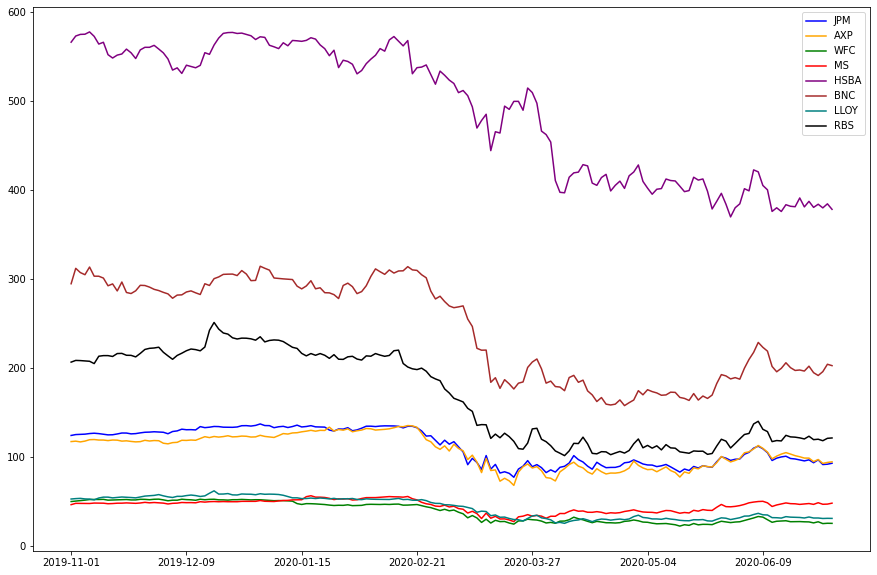

In [ ]:
graph_colors = ['blue','orange','green','red','purple','brown','teal','black']
df.plot.line(figsize=(15,10),color=graph_colors)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe683fafd0>,
      dtype=object)

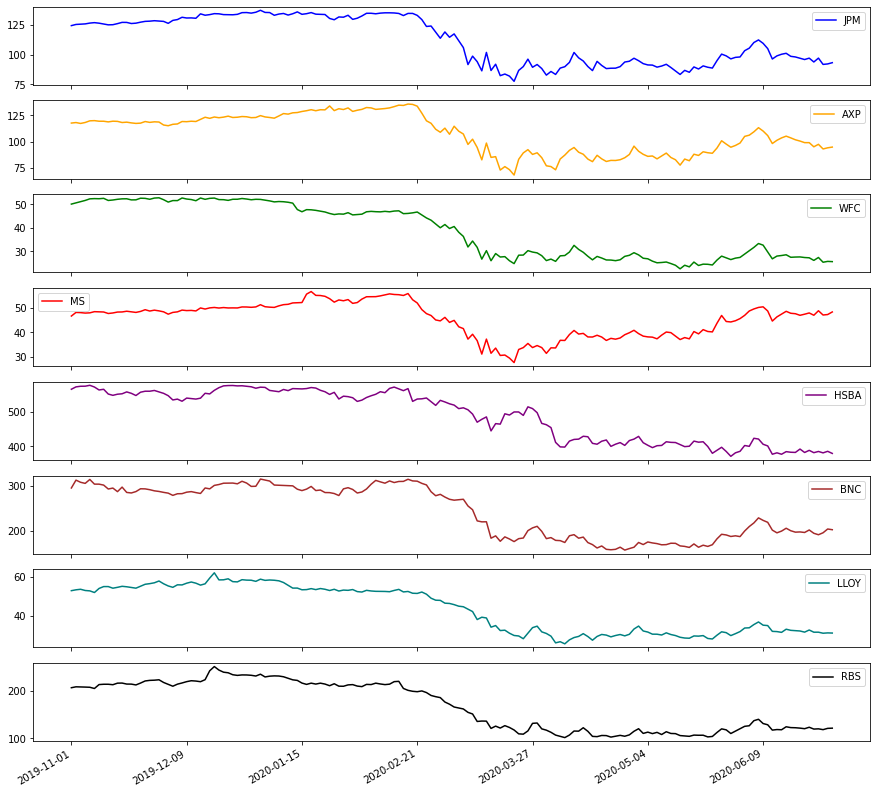

In [ ]:
df.plot.line(subplots=True, figsize=(15,15), color=graph_colors)

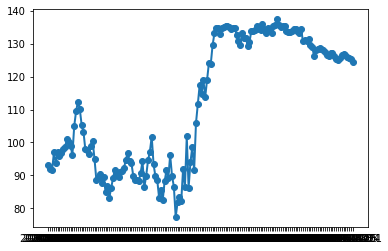

In [ ]:
from matplotlib.dates import DateFormatter, drange
 
dates = df.index.values

formatter = DateFormatter('%y-%m-%d')
date1 = datetime.date(2019, 11, 1)
date2 = datetime.date(2020, 6, 30)
delta = datetime.timedelta(days=30)
x_axis_dates = drange(date1, date2, delta)

fig, ax = plt.subplots()
plt.plot_date(dates, df['JPM'].values, linestyle='-', linewidth='2')
#plt.plot(df['JPM'].values)
#plt.set_xticklabels(pd.date_range(start='11/1/2019', end='6/30/2020',freq='M'))


#pd.date_range(start='11/1/2019', end='6/30/2020',freq='M')

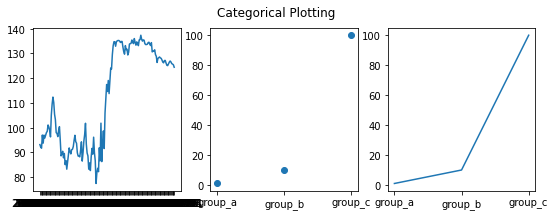

In [ ]:
dates = df.index.values   # str
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.plot(dates, df['JPM'])
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Stock Data vs Covid Data Plotting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install yfinance
import yfinance as yf
def stock(ticker):
    country_stock = yf.Ticker(ticker).history(period="1y")
    country_stock_close = country_stock[['Close']]
    return country_stock_close

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=be215b108a9f8bb3028014633686092bb6087b0162c322a891dc56a45a1a7dfe
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:

covid_data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
covid_data.index = covid_data["Date_reported"]
covid_data = covid_data[[" Country", " New_cases", " New_deaths"]]
for i in covid_data[" New_cases"]:
    if (i<0):
        covid_data = covid_data.replace(i, 0)
    


def covid(country):
    is_country = covid_data[' Country']== country
    covid_data_country = covid_data[is_country]
    return covid_data_country

In [ ]:

def visual(ticker, country, country_stock):
    
    country_stock_close = stock(ticker)
    covid_data_country = covid(country)
    
    stock_covid = country_stock_close.join(covid_data_country)
    plt.figure(figsize=(15,5))
    plt.plot(stock_covid.index, stock_covid["Close"], label = "Close Stock Price")
    plt.plot(stock_covid.index, stock_covid[" New_cases"], label = "No. of New Covid Cases")
    plt.plot(stock_covid.index, stock_covid[" New_deaths"], label = "No. of New Covid death Cases")
    plt.title("Covid versus " + country_stock + " Stock")
    #country_stock_join.plot(kind="line", subplots=True, sharex=True, sharey=False)
    plt.xticks(rotation = 90)
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Stock Price/No.of Cases")
    #plt.figure(figsize=(15,5))
    plt.show()

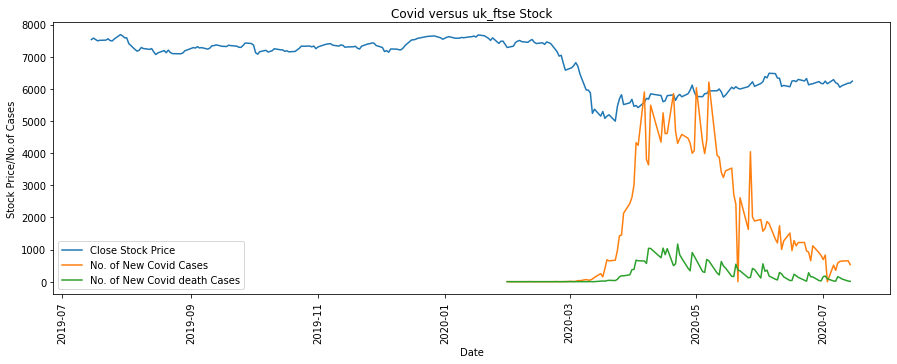

In [ ]:
visual("^FTSE", "The United Kingdom", "uk_ftse")